In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/archive'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/content/drive/MyDrive/Colab Notebooks/archive/amer_sign3.png
/content/drive/MyDrive/Colab Notebooks/archive/american_sign_language.PNG
/content/drive/MyDrive/Colab Notebooks/archive/amer_sign2.png
/content/drive/MyDrive/Colab Notebooks/archive/sign_mnist_test.csv
/content/drive/MyDrive/Colab Notebooks/archive/sign_mnist_train.csv
/content/drive/MyDrive/Colab Notebooks/archive/sign_mnist_train/sign_mnist_train.csv
/content/drive/MyDrive/Colab Notebooks/archive/sign_mnist_test/sign_mnist_test.csv


In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive/sign_mnist_train.csv')
test_df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/archive/sign_mnist_test.csv')

In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [ ]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7172 entries, 0 to 7171
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 43.0 MB


In [ ]:
train_df.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,...,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,...,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,121.000000,126.000000,130.000000,133.000000,137.000000,140.000000,142.000000,144.000000,146.000000,...,92.000000,96.000000,103.000000,112.000000,120.000000,125.000000,128.000000,128.000000,128.000000,125.500000
50%,13.000000,150.000000,153.000000,156.000000,158.000000,160.000000,162.000000,164.000000,165.000000,166.000000,...,144.000000,162.000000,172.000000,180.000000,183.000000,184.000000,184.000000,182.000000,182.000000,182.000000
75%,19.000000,174.000000,176.000000,178.000000,179.000000,181.000000,182.000000,183.000000,184.000000,185.000000,...,196.000000,202.000000,205.000000,207.000000,208.000000,207.000000,207.000000,206.000000,204.000000,204.000000
max,24.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000


In [ ]:
train_df.head(6)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179
5,16,161,168,172,173,178,184,189,193,196,...,76,74,68,62,53,55,48,238,255,255


In [ ]:
train_label=train_df['label']
train_label.head()
trainset=train_df.drop(['label'],axis=1)
trainset.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,107,118,127,134,139,143,146,150,153,156,...,207,207,207,207,206,206,206,204,203,202
1,155,157,156,156,156,157,156,158,158,157,...,69,149,128,87,94,163,175,103,135,149
2,187,188,188,187,187,186,187,188,187,186,...,202,201,200,199,198,199,198,195,194,195
3,211,211,212,212,211,210,211,210,210,211,...,235,234,233,231,230,226,225,222,229,163
4,164,167,170,172,176,179,180,184,185,186,...,92,105,105,108,133,163,157,163,164,179


In [ ]:
X_train = trainset.values
X_train = trainset.values.reshape(-1,28,28,1)
print(X_train.shape)

(27455, 28, 28, 1)


In [ ]:
test_label=test_df['label']
X_test=test_df.drop(['label'],axis=1)
print(X_test.shape)
X_test.head()

(7172, 784)


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,149,149,150,150,150,151,151,150,151,152,...,138,148,127,89,82,96,106,112,120,107
1,126,128,131,132,133,134,135,135,136,138,...,47,104,194,183,186,184,184,184,182,180
2,85,88,92,96,105,123,135,143,147,152,...,68,166,242,227,230,227,226,225,224,222
3,203,205,207,206,207,209,210,209,210,209,...,154,248,247,248,253,236,230,240,253,255
4,188,191,193,195,199,201,202,203,203,203,...,26,40,64,48,29,46,49,46,46,53


In [ ]:
from sklearn.preprocessing import LabelBinarizer
lb=LabelBinarizer()
y_train=lb.fit_transform(train_label)
y_test=lb.fit_transform(test_label)

In [ ]:
y_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 1, 0]])

In [ ]:
X_test=X_test.values.reshape(-1,28,28,1)

In [ ]:
print(X_train.shape,y_train.shape,X_test.shape,y_test.shape)

(27455, 28, 28, 1) (27455, 24) (7172, 28, 28, 1) (7172, 24)


In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  rotation_range = 0,
                                  height_shift_range=0.2,
                                  width_shift_range=0.2,
                                  shear_range=0,
                                  zoom_range=0.2,
                                  horizontal_flip=True,
                                  fill_mode='nearest')

X_test=X_test/255

Text(0.5, 1.0, 'label: 13  letter: M')

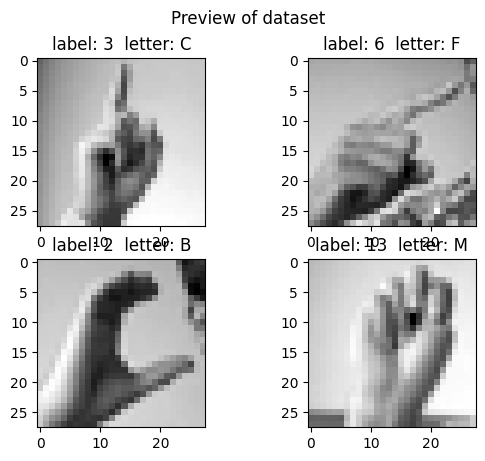

In [ ]:
fig,axe=plt.subplots(2,2)
fig.suptitle('Preview of dataset')
axe[0,0].imshow(X_train[0].reshape(28,28),cmap='gray')
axe[0,0].set_title('label: 3  letter: C')
axe[0,1].imshow(X_train[1].reshape(28,28),cmap='gray')
axe[0,1].set_title('label: 6  letter: F')
axe[1,0].imshow(X_train[2].reshape(28,28),cmap='gray')
axe[1,0].set_title('label: 2  letter: B')
axe[1,1].imshow(X_train[4].reshape(28,28),cmap='gray')
axe[1,1].set_title('label: 13  letter: M')

Text(0.5, 1.0, 'Frequency of each label')

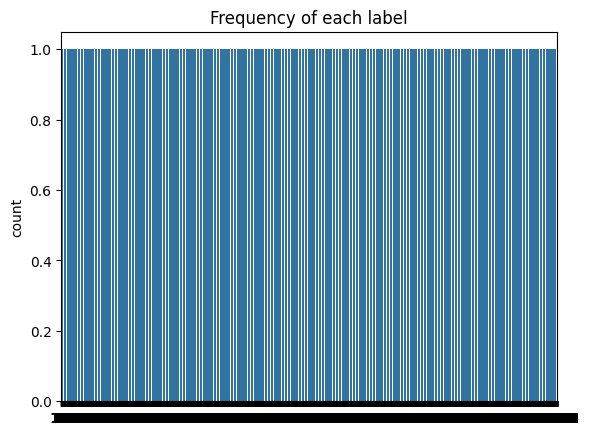

In [ ]:
sns.countplot(train_label)
plt.title("Frequency of each label")

In [ ]:
model=Sequential()
model.add(Conv2D(128,kernel_size=(5,5),
                 strides=1,padding='same',activation='relu',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(3,3),strides=2,padding='same'))
model.add(Conv2D(64,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))
model.add(Conv2D(32,kernel_size=(2,2),
                strides=1,activation='relu',padding='same'))
model.add(MaxPool2D((2,2),2,padding='same'))

model.add(Flatten())

In [ ]:
model.add(Dense(units=512,activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(units=24,activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 128)       3328      
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 128)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 32)          8224      
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 4, 4, 32)          0

In [ ]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(train_datagen.flow(X_train,y_train,batch_size=200),
         epochs = 35,
          validation_data=(X_test,y_test),
          shuffle=1
         )

Epoch 1/35
138/138 [==============================] - 104s 727ms/step - loss: 3.0006 - accuracy: 0.1016 - val_loss: 2.3423 - val_accuracy: 0.2775
Epoch 2/35
138/138 [==============================] - 100s 725ms/step - loss: 2.2304 - accuracy: 0.2906 - val_loss: 1.4369 - val_accuracy: 0.5039
Epoch 3/35
138/138 [==============================] - 99s 720ms/step - loss: 1.6565 - accuracy: 0.4531 - val_loss: 1.0427 - val_accuracy: 0.6516
Epoch 4/35
138/138 [==============================] - 99s 721ms/step - loss: 1.2904 - accuracy: 0.5686 - val_loss: 1.0692 - val_accuracy: 0.6185
Epoch 5/35
138/138 [==============================] - 99s 719ms/step - loss: 1.0927 - accuracy: 0.6354 - val_loss: 0.6763 - val_accuracy: 0.7639
Epoch 6/35
138/138 [==============================] - 100s 722ms/step - loss: 0.9314 - accuracy: 0.6858 - val_loss: 0.6572 - val_accuracy: 0.7536
Epoch 7/35
138/138 [==============================] - 101s 733ms/step - loss: 0.8021 - accuracy: 0.7274 - val_loss: 0.5602 - va

In [ ]:
(ls,acc)=model.evaluate(x=X_test,y=y_test)

225/225 [==============================] - 6s 28ms/step - loss: 0.0189 - accuracy: 0.9943


In [ ]:
print('MODEL ACCURACY = {}%'.format(acc*100))

MODEL ACCURACY = 99.42833185195923%


In [ ]:
import tensorflow as tf

# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [ ]:
import numpy as np
import tensorflow as tf

# Load TFLite model and allocate tensors.
interpreter = tf.lite.Interpreter(model_path='/content/model.tflite')
interpreter.allocate_tensors()

# Get input and output tensors.
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

# Test model on random input data.
input_shape = input_details[0]['shape']
input_data = np.array(np.random.random_sample(input_shape), dtype=np.float32)
interpreter.set_tensor(input_details[0]['index'], input_data)

interpreter.invoke()

# The function `get_tensor()` returns a copy of the tensor data.
# Use `tensor()` in order to get a pointer to the tensor.
output_data = interpreter.get_tensor(output_details[0]['index'])
print(output_data)

[[2.5734385e-03 7.8748488e-18 3.9854245e-14 5.8865152e-29 2.3457034e-15
  3.3804080e-09 4.7728513e-06 5.0235145e-09 2.5060090e-09 2.2155124e-14
  3.1160293e-03 1.4639258e-18 9.4937824e-16 1.5349122e-26 6.3432133e-01
  1.1439905e-14 9.9448952e-21 1.5912773e-19 3.4492486e-14 5.4584925e-19
  2.2190541e-16 1.7794975e-05 2.7903696e-21 3.5996655e-01]]


In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np

taille_attendue = 28

# Charger le modèle TFLite
interpreter = tf.lite.Interpreter(model_path='/content/drive/MyDrive/Colab Notebooks/tfModel/model.tflite')
interpreter.allocate_tensors()

# Récupérer les détails d'entrée du modèle TFLite
input_details = interpreter.get_input_details()

# Charger le fichier CSV du dossier de test
chemin_fichier_csv = '/content/drive/MyDrive/Colab Notebooks/archive/sign_mnist_test/sign_mnist_test.csv'
df_test = pd.read_csv(chemin_fichier_csv)

# Parcourir les lignes du fichier CSV
for index, row in df_test.iterrows():
    # Extraire l'étiquette (label) de la colonne correspondante dans le fichier CSV
    label = row['label']

    # Extraire les valeurs des pixels de l'image
    pixels = row.drop('label').values
    image = pixels.reshape((taille_attendue, taille_attendue, 1))  # Ajouter une dimension pour le canal (channel)

    # Prétraiter l'image
    image = np.array(image) / 255.0
    image = np.expand_dims(image, axis=0)  # Ajouter une dimension pour le lot (batch)
    image = np.float32(image)

    # Effectuer l'inférence
    interpreter.set_tensor(input_details[0]['index'], image)
    interpreter.invoke()

    predictions = interpreter.get_tensor(interpreter.get_output_details()[0]['index'])

    # Afficher les résultats ou effectuer toute action supplémentaire nécessaire
    print(f"Prédictions pour l'image avec l'étiquette {label} : {predictions}")


Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  3.1675760e-12 2.1324949e-07 7.6403731e-01 2.4216664e-16 2.9941227e-10
  2.0974045e-09 1.5973839e-13 3.6700001e-11 4.8246790e-10]]
Prédictions pour l'image avec l'étiquette 1 : [[6.6544556e-13 9.9999905e-01 6.9801217e-19 4.5497600e-08 7.8797558e-07
  3.9367713e-14 4.8492148e-18 1.0108352e-20 3.4409005e-13 2.5013445e-09
  9.4902361e-20 2.2855176e-11 2.6665677e-15 2.6195353e-14 3.6423491e-14
  2.3254669e-15 3.3087420e-12 3.0219152e-16 7.2418257e-21 8.3402760e-08
  1.7390757e-14 3.0063745e-09 9.0825166e-15 5.7074822e-16]]
Prédictions pour l'image avec l'étiquette 3 : [[4.50743227e-19 7.49797218e-16 8.08218272e-20 9.99870300e-01
  1.76294983e-14 1.44617492e-17 3.02664326e-19 3.65720863e-21
  5.29350297e-09 1.07106686e-07 1.59676010e-13 1.36957816e-15
  2.37165227e-14 1.23019862e-16 1.43543743e-22 1.14660655e-22
  1.29480701e-04 2.83085694e-10 1.88738502e-16 7.83375101e-11
  4.29172040e-08 5.33128527e-21 2.309757

32.666666666666664

Text(0.5, 1.0, 'label: 22  letter: W')

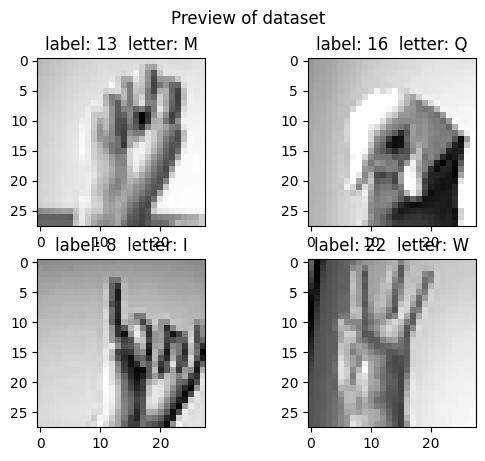

In [ ]:
fig,axe=plt.subplots(2,2)
fig.suptitle('Preview of dataset')
axe[0,0].imshow(X_train[4].reshape(28,28),cmap='gray')
axe[0,0].set_title('label: 13  letter: M')
axe[0,1].imshow(X_train[5].reshape(28,28),cmap='gray')
axe[0,1].set_title('label: 16  letter: Q')
axe[1,0].imshow(X_train[6].reshape(28,28),cmap='gray')
axe[1,0].set_title('label: 8  letter: I')
axe[1,1].imshow(X_train[7].reshape(28,28),cmap='gray')
axe[1,1].set_title('label: 22  letter: W')

In [ ]:
!python '/content/drive/MyDrive/Colab Notebooks/Untitled0.ipynb' \
    --model_file='/content/drive/MyDrive/Colab Notebooks/tfModel/model.tflite' \
    --label_file='/content/drive/MyDrive/Colab Notebooks/tfModel/labels.txt' \
    --export_directory='model_with_metadata'


Traceback (most recent call last):
  File "/content/drive/MyDrive/Colab Notebooks/Untitled0.ipynb", line 1, in <module>
    {"nbformat":4,"nbformat_minor":0,"metadata":{"colab":{"provenance":[],"mount_file_id":"1cRfUr8H32vRZjEpNGRr60XzqQ2zWvDtn","authorship_tag":"ABX9TyMSL6Mho9pbQy6BW0NSNyHM"},"kernelspec":{"name":"python3","display_name":"Python 3"},"language_info":{"name":"python"}},"cells":[{"cell_type":"code","execution_count":null,"metadata":{"id":"T6j2Y5cjxiKN"},"outputs":[],"source":[]},{"cell_type":"code","source":["import numpy as np # linear algebra\n","import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)\n","\n","# Input data files are available in the \"../input/\" directory.\n","# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory\n","\n","import os\n","for dirname, _, filenames in os.walk('/content/drive/MyDrive/Colab Notebooks/archive'):\n","    for filename in filenames:\n","        print(o

In [ ]:
!pip install tflite-support-nightly

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.7/227.7 kB 22.0 MB/s eta 0:00:00


In [ ]:
from tflite_support.metadata_writers import image_classifier
from tflite_support.metadata_writers import writer_utils

In [ ]:
ImageClassifierWriter = image_classifier.MetadataWriter
_MODEL_PATH = "/content/drive/MyDrive/Colab Notebooks/tfModel/model.tflite"
# Task Library expects label files that are in the same format as the one below.
_LABEL_FILE = "/content/drive/MyDrive/Colab Notebooks/tfModel/labelss.txt"
_SAVE_TO_PATH = "/content/drive/MyDrive/Colab Notebooks/tfModel/model_metadata.tflite"
# Normalization parameters is required when reprocessing the image. It is
# optional if the image pixel values are in range of [0, 255] and the input
# tensor is quantized to uint8. See the introduction for normalization and
# quantization parameters below for more details.
# https://www.tensorflow.org/lite/models/convert/metadata#normalization_and_quantization_parameters)
_INPUT_NORM_MEAN = 127.5
_INPUT_NORM_STD = 127.5

# Create the metadata writer.
writer = ImageClassifierWriter.create_for_inference(
    writer_utils.load_file(_MODEL_PATH), [_INPUT_NORM_MEAN], [_INPUT_NORM_STD],
    [_LABEL_FILE])

# Verify the metadata generated by metadata writer.
print(writer.get_metadata_json())

# Populate the metadata into the model.
writer_utils.save_file(writer.populate(), _SAVE_TO_PATH)

{
  "name": "ImageClassifier",
  "description": "Identify the most prominent object in the image from a known set of categories.",
  "subgraph_metadata": [
    {
      "input_tensor_metadata": [
        {
          "name": "image",
          "description": "Input image to be classified.",
          "content": {
            "content_properties_type": "ImageProperties",
            "content_properties": {
              "color_space": "RGB"
            }
          },
          "process_units": [
            {
              "options_type": "NormalizationOptions",
              "options": {
                "mean": [
                  127.5
                ],
                "std": [
                  127.5
                ]
              }
            }
          ],
          "stats": {
            "max": [
              1.0
            ],
            "min": [
              -1.0
            ]
          }
        }
      ],
      "output_tensor_metadata": [
        {
          "name": "proba

In [ ]:
import tensorflow as tf
import tflite_metadata_writer

# Charger le modèle TensorFlow Lite
interpreter = tf.lite.Interpreter(model_path='/content/drive/MyDrive/Colab Notebooks/tfModel/model.tflite')
interpreter.allocate_tensors()

# Définir la liste des noms de classes à partir du fichier labels.txt
with open('/content/drive/MyDrive/Colab Notebooks/tfModel/labels.txt', 'r') as file:
    class_labels = [line.strip() for line in file.readlines()]

# Charger le fichier de métadonnées existant (s'il y en a)
metadata = None
try:
    metadata = tflite_metadata_writer.MetadataPopulator.load_metadata_buffer(
        '/content/drive/MyDrive/Colab Notebooks/tfModel/model.tflite')
except:
    pass

# Ajouter les métadonnées
populator = tflite_metadata_writer.MetadataPopulator.for_inference_format()
populator.populate(['label'], [class_labels])
populator.populate_metadata_buffer(metadata)
populator.populate_metadata_buffer(interpreter)

# Écrire le modèle avec les métadonnées
with open('/content/drive/MyDrive/Colab Notebooks/tfModel/model_with_metadata.tflite', 'wb') as file:
    file.write(populator.get_metadata_buffer().tostring())
    file.write(interpreter.tensor(interpreter.get_output_details()[0]['index'])()[0].numpy())


ModuleNotFoundError: No module named 'tflite_metadata_writer'

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
